Import Libraries

In [ ]:
# Importing the essential libraries for data analysis and modeling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


1.	Loading the Dataset Code


In [ ]:
from google.colab import files
uploaded = files.upload()

# Automatically detect the uploaded file name
filename = list(uploaded.keys())[0]

# Load the dataset into a DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Display the first rows to verify the load
df.head()


Saving credit_risk_dataset.csv to credit_risk_dataset.csv


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


2. Inspecting the Dataset

In [ ]:
# Check dataset shape
print("Dataset Shape:", df.shape)

# Check data types and non-null counts
df.info()

# Summary statistics for numerical columns
df.describe()


Dataset Shape: (32581, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


3. Checking Missing Values

In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
loan_int_rate,3116
person_emp_length,895
person_income,0
person_age,0
person_home_ownership,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_status,0
loan_percent_income,0


4. Handling Missing Values

In [ ]:
# Fill missing values in employment length using the median
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)

# Fill missing values in interest rate using the mean
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)

# Verify that no missing values remain
df.isnull().sum()


/tmp/ipython-input-3125556861.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
/tmp/ipython-input-3125556861.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


5. Remove Outliers

In [ ]:
Q1 = df['person_emp_length'].quantile(0.25)
Q3 = df['person_emp_length'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['person_emp_length'] >= lower) & (df['person_emp_length'] <= upper)]


6. Split X,y

In [ ]:
TARGET_COL = "loan_status"

y = df[TARGET_COL].copy()
X = df.drop(columns=[TARGET_COL]).copy()


7.  Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Identify categorical columns in X only
categorical_cols = X.select_dtypes(include=['object']).columns

print("Categorical columns to encode:", list(categorical_cols))
print("\nEncoding results:\n")

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

    print(f"Column: {col}")
    print("Unique encoded values:", X[col].unique()[:10])  # First 10 values only
    print("-" * 40)

print("\nDtypes after encoding:")
print(X.dtypes)

print("\nFirst 5 rows after encoding:")
X.head()


Categorical columns to encode: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

Encoding results:

Column: person_home_ownership
Unique encoded values: [2 0 3 1]
----------------------------------------
Column: loan_intent
Unique encoded values: [1 3 5 4 2 0]
----------------------------------------
Column: loan_grade
Unique encoded values: [1 2 0 3 4 5 6]
----------------------------------------
Column: cb_person_default_on_file
Unique encoded values: [0 1]
----------------------------------------

Dtypes after encoding:
person_age                      int64
person_income                   int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_grade                      int64
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
dtype: object

Fir

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5.0,1,1,1000,11.14,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,0.55,1,4
5,21,9900,2,2.0,5,0,2500,7.14,0.25,0,2


8.  Scaling Numeric Features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 , stratify=y
)

# 2. Scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)

(25382, 11) (6346, 11)


9. EDA


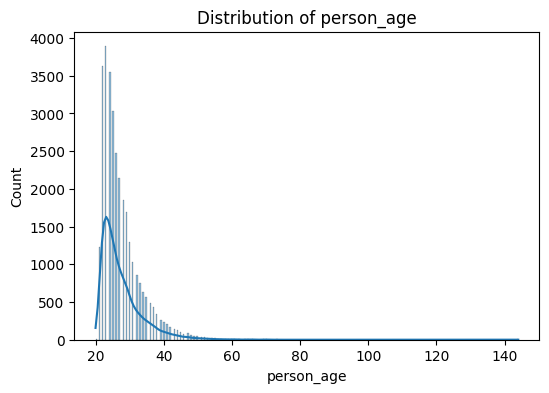

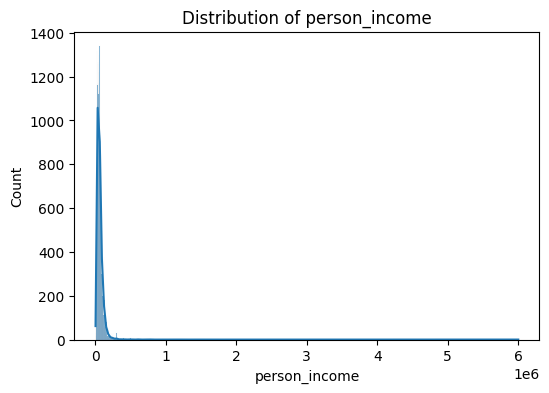

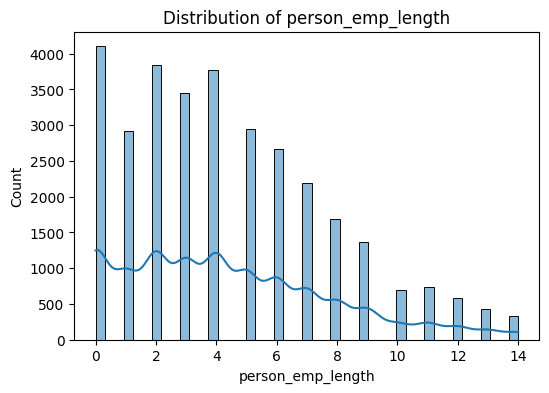

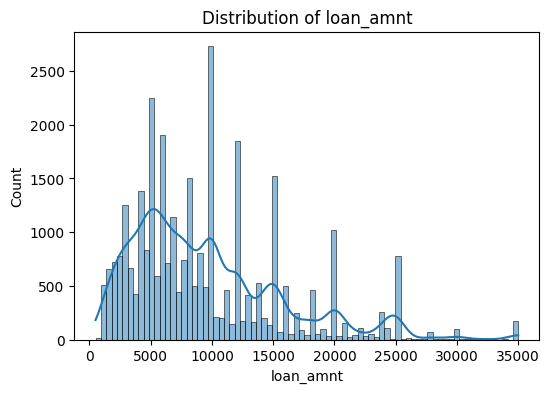

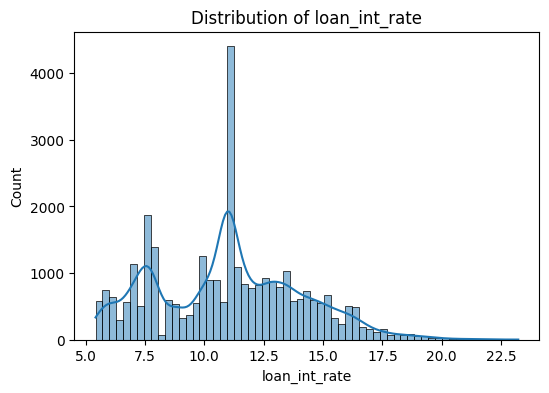

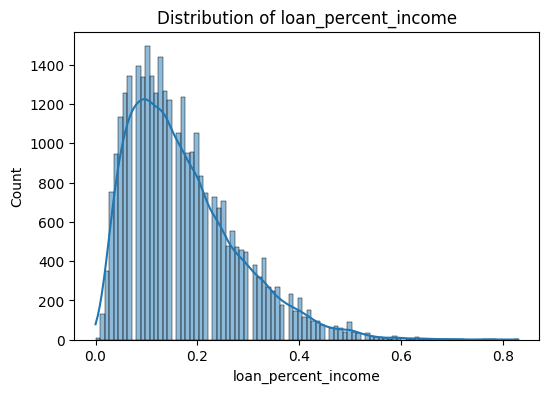

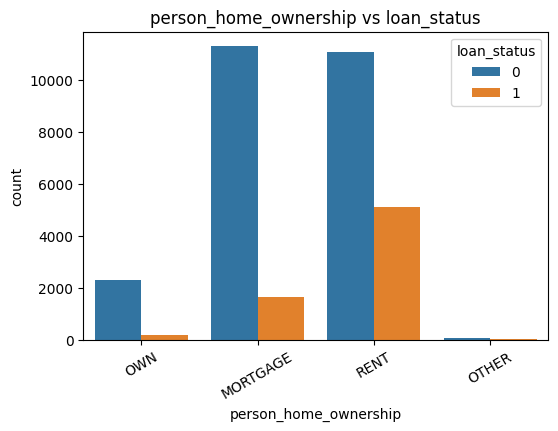

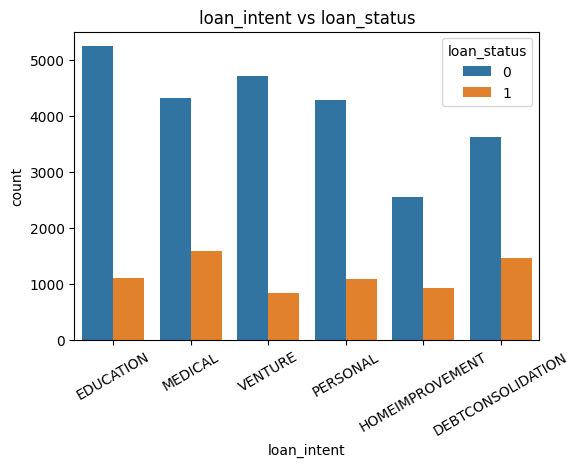

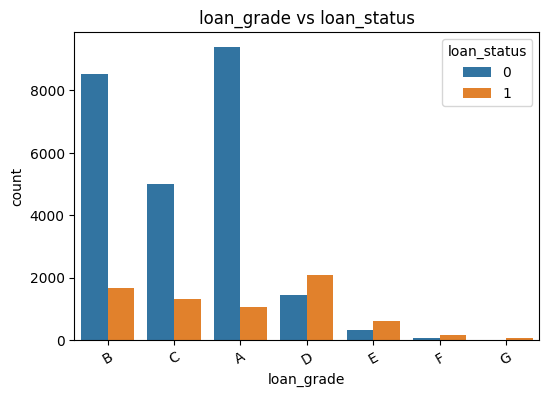

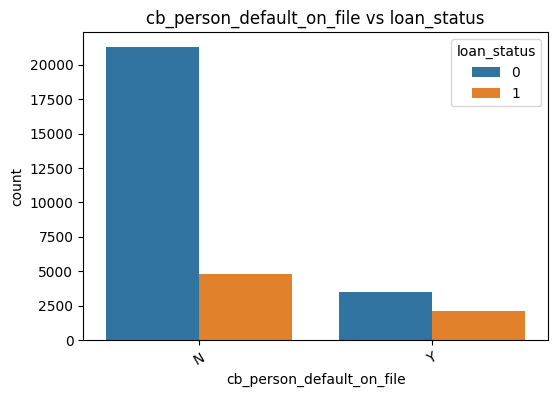

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of numerical features
numeric_features = ['person_age', 'person_income', 'person_emp_length',
                    'loan_amnt', 'loan_int_rate', 'loan_percent_income']

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# 2. Categorical features vs the target variable
categorical_features = ['person_home_ownership', 'loan_intent',
                        'loan_grade', 'cb_person_default_on_file']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='loan_status')
    plt.title(f"{col} vs loan_status")
    plt.xticks(rotation=30)
    plt.show()


10.	Preparing the Models and cross validation:



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(max_depth=4),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(),
    "NeuralNet": MLPClassifier(max_iter=500)
}

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    cv_results[name] = scores
    print(name, "CV mean:", scores.mean())


LogisticRegression CV mean: 0.8452844787591811
DecisionTree CV mean: 0.9083209666486773
RandomForest CV mean: 0.9311324126963283
SVM CV mean: 0.88531264701687
NeuralNet CV mean: 0.9113154194514019


11. Training the Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Train all models
best_log_reg = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)
best_tree = DecisionTreeClassifier(max_depth=4).fit(X_train_scaled, y_train)
best_rf = RandomForestClassifier().fit(X_train_scaled, y_train)
best_svm = SVC(probability=True).fit(X_train_scaled, y_train)
best_nn = MLPClassifier(max_iter=500).fit(X_train_scaled, y_train)

# Store all trained models
best_model = {
    "Logistic Regression": best_log_reg,
    "Decision Tree": best_tree,
    "Random Forest": best_rf,
    "SVM": best_svm,
    "Neural Network": best_nn
}


12.	PCA and K-means

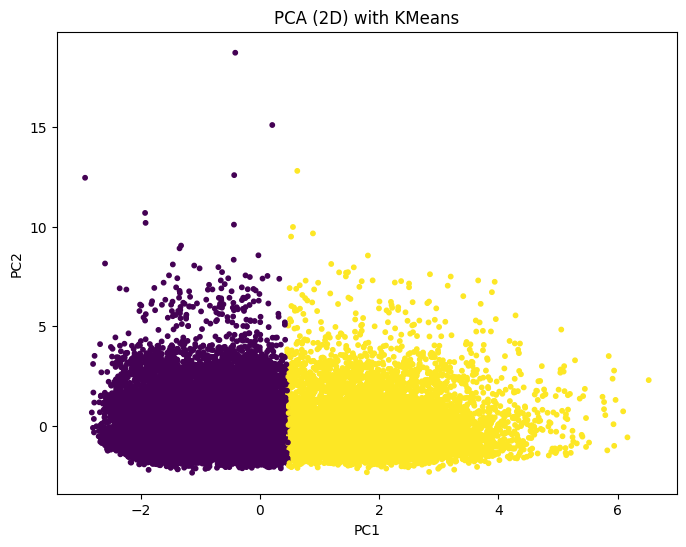

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(X_train_pca)
train_clusters = kmeans.predict(X_train_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=train_clusters, cmap='viridis', s=10)
plt.title("PCA (2D) with KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


13. Evaluation Code (Accuracy, Precision, Recall, F1, ROC-AUC, Confusion Matrix) with Confusion Matrix


------ Logistic Regression ------
Accuracy : 0.8413173652694611
Precision: 0.7281323877068558
Recall   : 0.44221105527638194
F1-score : 0.5502456453774006
ROC-AUC  : 0.8415084565917471


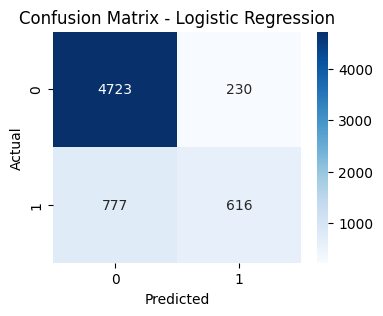


------ Decision Tree ------
Accuracy : 0.9067128900094548
Precision: 0.9651567944250871
Recall   : 0.5965541995692749
F1-score : 0.7373558118899733
ROC-AUC  : 0.8800908728697279


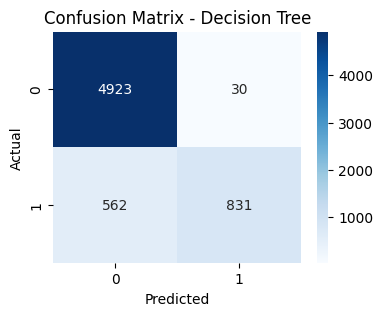


------ Random Forest ------
Accuracy : 0.9298770879294044
Precision: 0.9610894941634242
Recall   : 0.7092605886575736
F1-score : 0.8161916563403552
ROC-AUC  : 0.9318631750080333


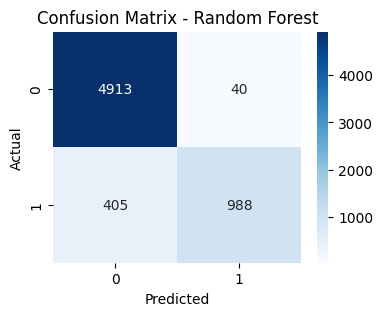


------ SVM ------
Accuracy : 0.8822880554680114
Precision: 0.8604910714285714
Recall   : 0.5534816941852118
F1-score : 0.6736566186107471
ROC-AUC  : 0.8703963705348582


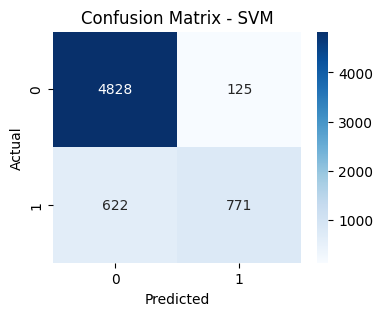


------ Neural Network ------
Accuracy : 0.9090765836747557
Precision: 0.8930635838150289
Recall   : 0.665470208183776
F1-score : 0.762649115590292
ROC-AUC  : 0.9060764872500717


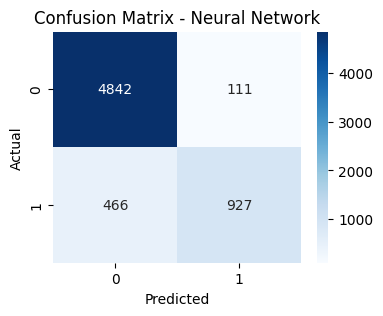


The Best Model: Random Forest


array([[4913,   40],
       [ 405,  988]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

evaluation_results = {}

for name, model in best_model.items():  # best_models contains tuned models from Part 3
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    evaluation_results[name] = [accuracy, precision, recall, f1, roc]

    print(f"\n------ {name} ------")
    print("Accuracy :", accuracy)
    print("Precision:", precision)
    print("Recall   :", recall)
    print("F1-score :", f1)
    print("ROC-AUC  :", roc)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


results_formatted = []
for name, metrics_list in evaluation_results.items():
    results_formatted.append({"name": name, "f1": metrics_list[3]})

best = max(results_formatted, key=lambda d: d["f1"] if not np.isnan(d["f1"]) else -1)
print("\nThe Best Model:", best["name"])
best_models = best_model[best["name"]]

cm = confusion_matrix(y_test, best_models.predict(X_test_scaled))
cm

14. ROC Curve

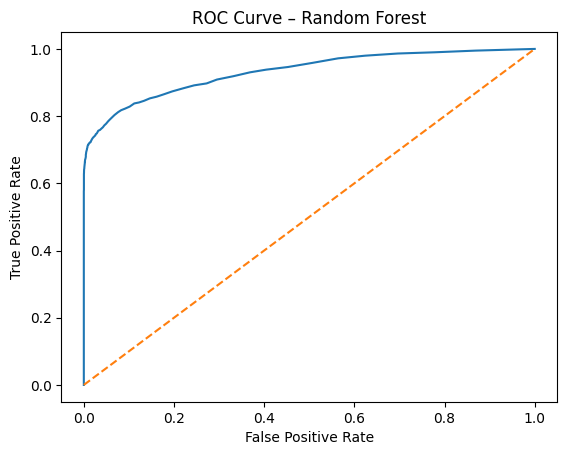

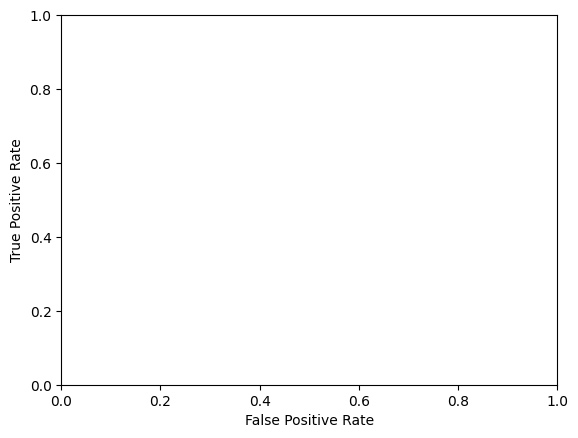

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# ROC curve
if hasattr(best_models, "decision_function"):
    y_scores = best_models.decision_function(X_test_scaled)
elif hasattr(best_models, "predict_proba"):
    y_scores = best_models.predict_proba(X_test_scaled)[:,1]
else:
    y_scores = best_models.predict(X_test_scaled)

fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.title(f"ROC Curve – {best['name']}")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.show()
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.show()
